In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist #handwritten images of digits between 0-9

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 11s 1us/step


In [51]:
#print(x_train[0])

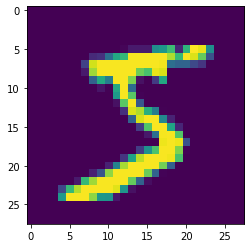

In [9]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()

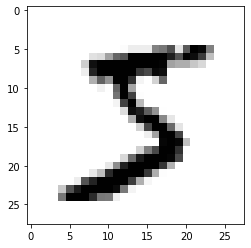

In [12]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

In [28]:
#Normalizing data to improve network performance

x_train = tf.keras.utils.normalize(x_train, axis =1)
x_test =tf.keras.utils.normalize(x_test, axis = 1)

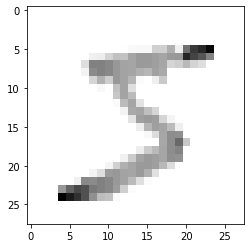

In [29]:
#visualizing changes after normalizing

plt.imshow(x_train[0], cmap= plt.cm.binary)

In [30]:
#Building the model architecture

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten()) #first layer. We flatten the input
model.add(tf.keras.layers.Dense(128, activation =tf.nn.relu)) #first hidden layer: 128 neurons, activation function. Relu is mostly the default
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu)) #adding another dense layer
model.add(tf.keras.layers.Dense(10, activation= tf.nn.softmax)) #final layer


#Parameters for traiing the model
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'] )


#Train the model
model.fit(x_train, y_train, epochs = 3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 3s 56us/sample - loss: 0.2639 - accuracy: 0.9222
Epoch 2/3
60000/60000 [==============================] - 3s 51us/sample - loss: 0.1072 - accuracy: 0.9668
Epoch 3/3
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0739 - accuracy: 0.9766


In [31]:
val_loss, val_acc = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 36us/sample - loss: 0.0998 - accuracy: 0.9675


In [32]:
#Saving the model
model.save('init_model')

INFO:tensorflow:Assets written to: init_model\assets


In [33]:
new_model = tf.keras.models.load_model('init_model')


In [35]:
predictions = new_model.predict(x_test)

In [36]:
print(predictions)

[[1.1346087e-09 3.6108170e-09 1.7630854e-06 ... 9.9995542e-01
  3.2879889e-08 1.3089067e-07]
 [3.1748211e-08 7.7072568e-03 9.9225485e-01 ... 8.4549093e-08
  7.3930545e-07 1.7018566e-12]
 [5.3968841e-07 9.9987698e-01 2.2929387e-05 ... 2.2012378e-05
  3.0403833e-05 1.0596118e-07]
 ...
 [1.0456397e-07 3.7296113e-07 2.5727690e-08 ... 6.9931853e-06
  3.0870963e-06 1.8363132e-03]
 [2.7091658e-06 1.1335966e-06 6.5706342e-07 ... 6.6224203e-07
  9.1220136e-05 1.3194028e-08]
 [4.0435548e-06 4.8331959e-08 1.0535153e-06 ... 7.7536461e-10
  6.2058518e-08 2.7958083e-09]]


In [37]:
import numpy as np

In [38]:
print(np.argmax(predictions[0]))

7


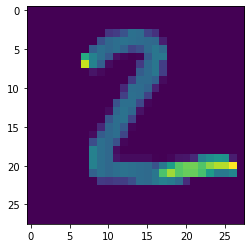

In [50]:
plt.imshow(x_test[1])
plt.show()